#Project 2- Recommender Systems

In [ ]:
#!pip install pandas
#!pip install numpy
!pip install regex
!pip install nltk
!pip install sklearn
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import regex as re
import random
import nltk
import multiprocessing
import umap.umap_ as umap
import umap.plot
import re
import string
import warnings
np.random.seed(0)
random.seed(0)

You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
#Importing Drive
#runningOnColab = 'google.colab' in sys.modules
#if runningOnColab:
#from google.colab import drive
#drive.mount('/content/drive')
#%cd '/content/drive/Shareddrives/ECE219/Project 3'
%cd 'E:\Downloads\UCLA_Courses\Winter_2022\219_LargeScale_Data_Mining\Project_3\Synthetic_Movie_Lens-20220211T234626Z-001'

[WinError 123] The filename, directory name, or volume label syntax is incorrect: "'E:\\Downloads\\UCLA_Courses\\Winter_2022\\219_LargeScale_Data_Mining\\Project_3\\Synthetic_Movie_Lens-20220211T234626Z-001'"
C:\Users\veera\AppData\Local\Programs\Python\Python39\Scripts


In [ ]:
Dataset_Rep = 'Dataset_Movie_Lens/'

In [ ]:
#Ratings_file.head()
Dataset_loc = 'E:/Downloads/UCLA_Courses/Winter_2022/219_LargeScale_Data_Mining/Project_3/Synthetic_Movie_Lens-20220211T234626Z-001/Dataset_Movie_Lens/'
Dataset = pd.read_csv(Dataset_loc+"ratings.csv") 
Dataset.head()

,Unnamed: 0,userId,movieId,rating,timestamp
0,0,496,112852,3.0,1415520462
1,1,391,1947,4.0,1030945141
2,2,387,1562,1.5,1095041022
3,3,474,2716,4.5,1053020930
4,4,483,88125,4.5,1311337237


In [ ]:
Dataset.describe()

,Unnamed: 0,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,50417.500000,326.127564,19435.295718,3.501562,1.205946e+09
std,29108.990209,182.618491,35530.987199,1.042540,2.162610e+08
min,0.000000,1.000000,1.000000,0.500000,8.281246e+08
25%,25208.750000,177.000000,1199.000000,3.000000,1.019124e+09
50%,50417.500000,325.000000,2991.000000,3.500000,1.186087e+09
75%,75626.250000,477.000000,8122.000000,4.000000,1.435994e+09
max,100835.000000,610.000000,193609.000000,5.000000,1.537799e+09


#Question 1

Explore the Dataset: In this question, we explore the structure of the data.

Compute the sparsity of the movie rating dataset:
Sparsity =
Total number of available ratings
Total number of possible ratings

In [ ]:
Ratings_file = pd.read_csv(Dataset_loc+"ratings.csv",usecols=['userId','movieId','rating','timestamp']) 
user_ID = Ratings_file.pop('userId').values
movie_ID = Ratings_file.pop('movieId').values
Rating = Ratings_file.pop('rating').values
Sparsity = len(Rating)/(len(set(movie_ID))*len(set(user_ID)))
print('Sparsity:',Sparsity)

Sparsity: 0.016999683055613623


Plot a histogram showing the frequency of the rating values: Bin the raw rating values
into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the
number of entries in the ratings matrix R that fall within each bin and use this count as the
height of the vertical axis for that particular bin. Comment on the shape of the histogram.

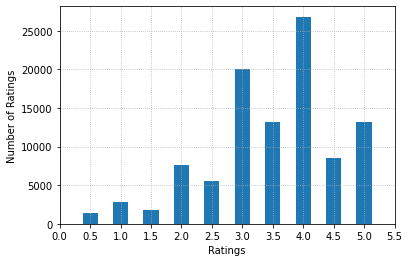

In [ ]:
uni_values, uni_indices = np.unique(Rating, return_inverse=True)
plt.bar(uni_values, np.bincount(uni_indices), width=0.25)
locs, labels = plt.xticks()  
plt.grid(linestyle=':')
plt.xticks(np.arange(0,6,0.5),rotation=0)
plt.ylabel('Number of Ratings')
plt.xlabel('Ratings')
plt.savefig('Q2_1.png',dpi=500,bbox_inches='tight')
plt.show()

Plot the distribution of the number of ratings received among movies: The X-axis
should be the movie index ordered by decreasing frequency and the Y -axis should be the number
of ratings the movie has received; ties can broken in any way. A monotonically decreasing trend
is expected.

[329 317 307 ...   1   1   1]


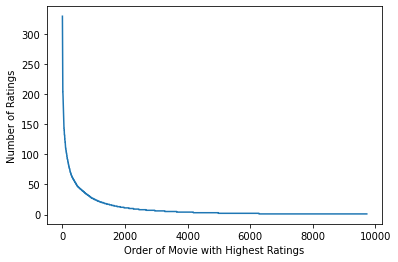

In [ ]:
#Movie ID vs number of ratings
unique_movie,unique_counts=np.unique(movie_ID,return_counts=True)
count_sorts=np.argsort(unique_counts)
length=range(1,len(unique_movie)+1)
count=unique_counts[count_sorts[::-1]] #Decreasing Frequency
print(count)
plt.plot(length,count)
plt.xlabel('Order of Movie with Highest Ratings')
plt.ylabel('Number of Ratings')
plt.show()


Plot the distribution of ratings among users: The X-axis should be the user index ordered
by decreasing frequency and the Y -axis should be the number of movies the user has rated.
The requirement of the plot is similar to that in Question C.


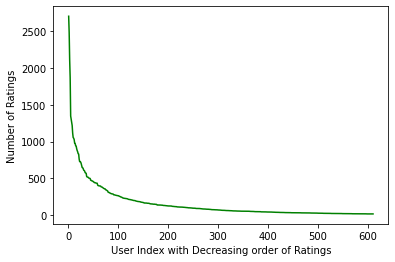

In [ ]:
#User ID vs Number of movies the user has rated
unique_movie1,unique_counts1=np.unique(user_ID,return_counts=True)
count_sorts=np.argsort(unique_counts1)
length1=range(1,len(unique_movie1)+1)
count1=unique_counts1[count_sorts[::-1]] #Decreasing Frequency
#print(count1)
plt.plot(length1,count1,color='g')
plt.xlabel('User Index with Decreasing order of Ratings')
plt.ylabel('Number of Ratings')
plt.show()


Discuss the salient features of the distributions from Questions C,D and their implications
for the recommendation process.

Compute the variance of the rating values received by each movie: Bin the variance
values into intervals of width 0.5 and use the binned variance values as the horizontal axis.
Count the number of movies with variance values in the binned intervals and use this count as
the vertical axis. Briefly comment on the shape of the resulting histogram

In [ ]:
movie_set=set(movie_ID)
movie_set=list(movie_set) #can't subscript set
list_movies=[]
list_variance=[]
for movie_ele in range(len(movie_set)):
  #For each  unique movie ID, find all it's indexes from the movie ID corpus to access corresponding ratings
  pos=[ind for ind,ele in enumerate(movie_ID) if ele==movie_set[movie_ele] ]
  #list of all corresponding rattings values to find variance of a single unique movie ID's ratings
  variance=np.var(np.array(Rating[pos]))
  list_variance.append(variance)
  list_movies.append(movie_set[movie_ele])

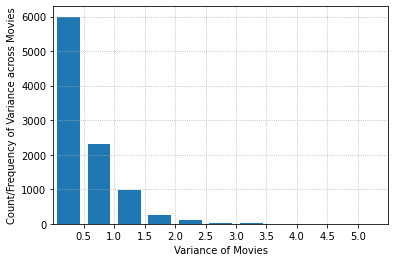

In [ ]:
#Plotting histogram
plt.hist(list_variance, bins=np.arange(0,5.5,0.5),rwidth=0.75)
plt.xticks(np.arange(0.5,5.5,0.5))
plt.xlim([0, 5.5])
plt.grid(linestyle=':')
plt.xlabel('Variance of Movies')
plt.ylabel('Count/Frequency of Variance across Movies')
plt.show()

#Question 2

Understanding the Pearson Correlation Coefficient:


In [ ]:
print(max(Rating),min(Rating))
#Ratings dynamic range is from 0.5 to 5


5.0 0.5


#Question 4

Design a k-NN collaborative filter to predict the ratings of the movies in the
original dataset and evaluate its performance using 10-fold cross validation. Sweep k (number of
neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average
MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis)
against k (X-axis) and average MAE (Y-axis) against k (X-axis).

In [ ]:
!pip install scikit-surprise
from surprise import Reader, Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate, KFold, train_test_split


#Get lineformat corresponding tags CSV file in dataset  - Documentation - https://surprise.readthedocs.io/en/stable/reader.html
CSV_reader=Reader(rating_scale=(0.5, 5),skip_lines=1,sep=',', line_format='user item rating timestamp')
Dataset_Ratings=Dataset.load_from_file(Dataset_loc+'ratings.csv',reader=CSV_reader)

k=np.arange(2,102,2)
list_RMSE=[]
lisst_mae=[]
for ele in k:
  knn=KNNWithMeans(k=ele,sim_options={'name':'pearson'})
  final_res=cross_validate(knn,measures=['rmse','mae'],data=Dataset_Ratings,cv=10)
  list_RMSE.append(np.mean(final_res['test_rmse']))
  lisst_mae.append(np.mean(final_res['test_mae']))

You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

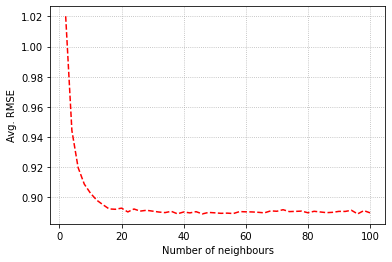

In [ ]:
plt.plot(k,list_RMSE,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q10a.png',dpi=300,bbox_inches='tight')
plt.show()

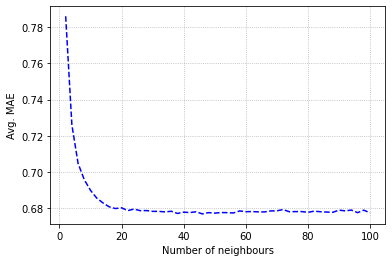

In [ ]:
plt.plot(k,lisst_mae,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.ylabel('Avg. MAE')
plt.xlabel('Number of neighbours')
plt.savefig('Q10b.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
# Question 5

#In this question, we are asked to find the minimum value of k , beyond which the errors for k-NN user-based CF
# level out. Judging from the curves in Figure 5, we see that this occurs at k = 20 , with the steady-state RMSE =
# 0.89 and steady-state MAE = 0.68 .

In [ ]:
# Question 6
from surprise import accuracy

Popular_RMSE = []
k_Fold_valid =  KFold(n_splits=10)
for item in k:
    Local_RMSE = []
    print('Running for the iteration with K=',item)
    for trainset, testset in k_Fold_valid.split(Dataset_Ratings):
        Pop_Trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]<=2):
                Pop_Trim_list.append(unique[i])
        Pop_Trimmed_set = [j for j in testset if j[1] not in Pop_Trim_list]
        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(Pop_Trimmed_set)
        Local_RMSE.append(accuracy.rmse(res,verbose=False))
    Popular_RMSE.append(np.mean(Local_RMSE))

Running for the iteration with K= 2
Running for the iteration with K= 4
Running for the iteration with K= 6
Running for the iteration with K= 8
Running for the iteration with K= 10
Running for the iteration with K= 12
Running for the iteration with K= 14
Running for the iteration with K= 16
Running for the iteration with K= 18
Running for the iteration with K= 20
Running for the iteration with K= 22
Running for the iteration with K= 24
Running for the iteration with K= 26
Running for the iteration with K= 28
Running for the iteration with K= 30
Running for the iteration with K= 32
Running for the iteration with K= 34
Running for the iteration with K= 36
Running for the iteration with K= 38
Running for the iteration with K= 40
Running for the iteration with K= 42
Running for the iteration with K= 44
Running for the iteration with K= 46
Running for the iteration with K= 48
Running for the iteration with K= 50
Running for the iteration with K= 52
Running for the iteration with K= 54
Runni

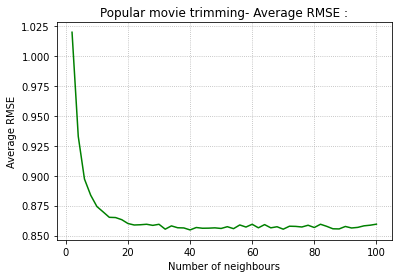

In [ ]:
plt.plot(k,Popular_RMSE,color='g')
plt.grid(linestyle=':')
plt.title('Popular movie trimming- Average RMSE :')
plt.ylabel('Average RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q12.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
print("RMSE- Popular movie trimming- Minimum avg. :", min(Popular_RMSE))


RMSE- Popular movie trimming- Minimum avg. : 0.8546786823828751


In [ ]:
UnPopular_RMSE = []
k_Fold_valid =  KFold(n_splits=10)
for item in k:
    Local_RMSE = []
    print('Running for the iteration with K=',item)
    for trainset, testset in k_Fold_valid.split(Dataset_Ratings):
        Unpop_trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                Unpop_trim_list.append(unique[i])
        Unpop_trimmed_set = [j for j in testset if j[1] not in Unpop_trim_list]
        Unpop_res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(Unpop_trimmed_set)
        Local_RMSE.append(accuracy.rmse(Unpop_res,verbose=False))
    UnPopular_RMSE.append(np.mean(Local_RMSE))

Running for the iteration with K= 2
Running for the iteration with K= 4
Running for the iteration with K= 6
Running for the iteration with K= 8
Running for the iteration with K= 10
Running for the iteration with K= 12
Running for the iteration with K= 14
Running for the iteration with K= 16
Running for the iteration with K= 18
Running for the iteration with K= 20
Running for the iteration with K= 22
Running for the iteration with K= 24
Running for the iteration with K= 26
Running for the iteration with K= 28
Running for the iteration with K= 30
Running for the iteration with K= 32
Running for the iteration with K= 34
Running for the iteration with K= 36
Running for the iteration with K= 38
Running for the iteration with K= 40
Running for the iteration with K= 42
Running for the iteration with K= 44
Running for the iteration with K= 46
Running for the iteration with K= 48
Running for the iteration with K= 50
Running for the iteration with K= 52
Running for the iteration with K= 54
Runni

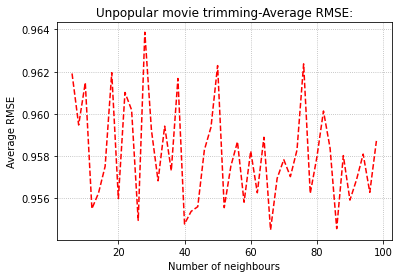

Unpopular movie trimming-Minimum average RMSE: 0.9545104839890124


In [ ]:
plt.plot(k[2:-1],UnPopular_RMSE[2:-1],linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Unpopular movie trimming-Average RMSE:')
plt.ylabel('Average RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q13.png',dpi=300,bbox_inches='tight')
plt.show()
print("Unpopular movie trimming-Minimum average RMSE:", min(UnPopular_RMSE))


In [ ]:
#High Variance Movie Trimming
High_Var_RMSE = []
k_Fold_valid =  KFold(n_splits=10)
dict_of_items = {}
for j in Dataset_Ratings.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    Local_RMSE = []
    print('Running for the iteration with K =',item)
    for trainset, testset in k_Fold_valid.split(Dataset_Ratings):
        High_Var_trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        Final_High_res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(High_Var_trimmed_set)
        Local_RMSE.append(accuracy.rmse(Final_High_res,verbose=False))
    High_Var_RMSE.append(np.mean(Local_RMSE))

Running for the iteration with K = 2
Running for the iteration with K = 4
Running for the iteration with K = 6
Running for the iteration with K = 8
Running for the iteration with K = 10
Running for the iteration with K = 12
Running for the iteration with K = 14
Running for the iteration with K = 16
Running for the iteration with K = 18
Running for the iteration with K = 20
Running for the iteration with K = 22
Running for the iteration with K = 24
Running for the iteration with K = 26
Running for the iteration with K = 28
Running for the iteration with K = 30
Running for the iteration with K = 32
Running for the iteration with K = 34
Running for the iteration with K = 36
Running for the iteration with K = 38
Running for the iteration with K = 40
Running for the iteration with K = 42
Running for the iteration with K = 44
Running for the iteration with K = 46
Running for the iteration with K = 48
Running for the iteration with K = 50
Running for the iteration with K = 52
Running for the 

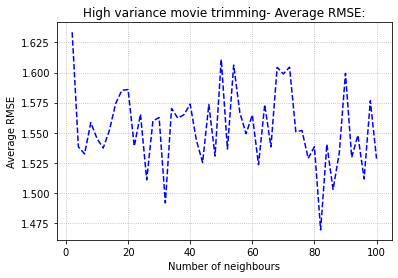

In [ ]:
plt.plot(k,High_Var_RMSE,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('High variance movie trimming- Average RMSE:')
plt.ylabel('Average RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q14.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
print("High variance movie trimming- Minimum average RMSE:", min(High_Var_RMSE))


High variance movie trimming- Minimum average RMSE: 1.469279756781472


In [ ]:
k = 20
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res  = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)

In [ ]:
fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for kNN CF (k = 20)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q15.png',dpi=300,bbox_inches='tight')
plt.show() 